In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [2]:
file_audio = "../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled1.wav"

In [3]:
ipd.Audio(file_audio)

In [4]:
signal, sr = librosa.load(file_audio)
print(sr)

22050


In [5]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)


In [6]:
mfccs.shape

(13, 342)

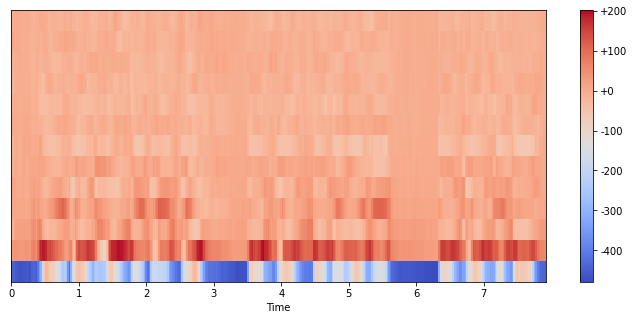

In [7]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


In [8]:
delta_mfccs = librosa.feature.delta(mfccs)


In [9]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)


In [10]:
delta_mfccs.shape


(13, 342)

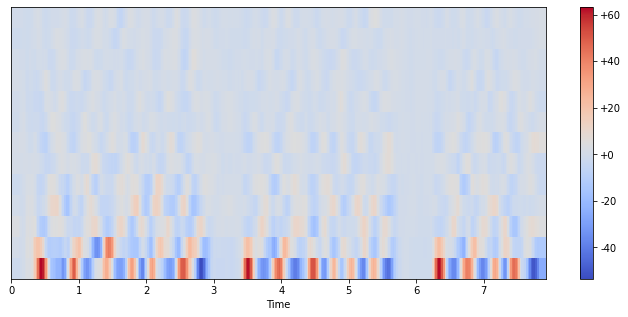

In [11]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


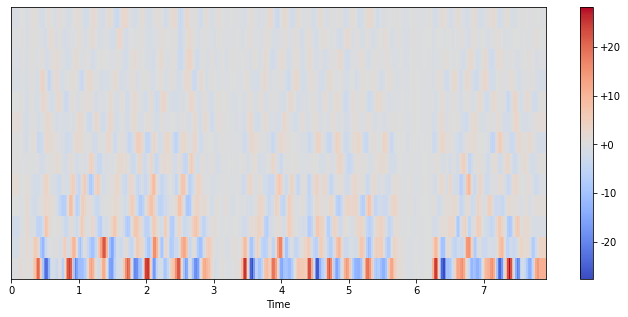

In [12]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


In [13]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))


In [14]:
mfccs_features.shape


(39, 342)

# Trích xuất đặc trưng MFCC

In [15]:
from collections import defaultdict
import re

input_path = '../input/group10-speechprocessing/10'
output_path = './'
all_labels = ['0','1','2','3','4',
              '5','6','7','8','9',
              'trieu','nghin','tram','linh','muoi',
              'm1', 'tu', 'lam','mot','sil']
data = defaultdict(list)
labels = defaultdict(list)
    
def export_mcfcc(file_path):
    y, sr = librosa.load(file_path)
    mcfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mcfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
    return mcfccs_features.T

def export_all_mcfcc():
    for folder_name in os.listdir(os.path.join(input_path)):
        for file_name in os.listdir(os.path.join(input_path, folder_name)):
            if file_name.endswith(".txt"):
                file_audio = os.path.join(input_path, folder_name, file_name.replace(".txt", ".wav"))
                file_txt = os.path.join(input_path, folder_name, file_name)
                if os.path.exists(file_txt) is False or os.path.exists(file_audio) is False:
                    continue

                print(file_txt)
                data_frame = pd.read_csv(file_txt, sep='\t', header=None)
                for _, row in data_frame.iterrows():
                    signal, sr = librosa.load(
                        path=file_audio,
                        offset = float(row[0]),
                        duration = float(row[1]) - float(row[0])
                    )
                    mcfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
                    delta_mfccs = librosa.feature.delta(mfccs)
                    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
                    mcfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
                    x = str(row[2]).replace(" ","")
                    x = str(x).replace("\\","")
                    if x=='nan':
                        x= 'sil'
                    if x == 'ngin':
                        x = 'nghin'
                    data[x].append(mcfccs_features.T)
                    labels[x].append(all_labels.index(x))


In [16]:
print(labels['trieu'])

[]


In [17]:
a = export_mcfcc(file_audio)


In [18]:
export_all_mcfcc()

../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled14.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled37-50.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled8.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled9.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled32.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled25.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled19.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled76-100.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1914
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1347
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled51-75.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1864
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1967
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled7.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled13.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled17.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled29.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled27.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled31.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled2.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled3.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled26.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled30.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled6.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled20.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled1.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=0
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled10.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled24.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled18.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled4.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled28.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled22wav.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled5.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled23.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled15.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled16.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled21.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled33-36.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1470
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled11.txt
../input/group10-speechprocessing/10/19021217_DinhVietAnh/untitled12.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec17.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec1.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec2.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec5.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec14.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec19.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec15.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec6.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec4.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1966
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec3.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec13.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1855
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec16.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec7.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec18.txt
../input/group10-speechprocessing/10/19020093_HoangHuuBach/Rec8.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2018
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/40.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/44.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/3.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/84.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/61.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/69.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/30.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/36.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1792
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/47.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/10.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/19.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/45.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/5.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/75.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/59.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/35.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=719
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/52.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/7.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1727
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/55.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/34.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1823
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/96.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/21.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/8.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/82.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/54.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/18.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/43.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/67.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/53.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/17.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/38.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/83.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/77.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/51.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/89.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1806
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/11.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/50.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/88.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/79.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/31.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/68.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/62.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/42.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/48.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/32.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/92.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/23.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1695
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021347_BuiThuPhuong/91.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/76.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/86.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/64.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/74.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/87.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/97.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/9.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/33.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/66.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/37.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/16.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/49.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/1.txt
../input/group10-speechprocessing/10/19021347_BuiThuPhuong/80.txt
../input/gro

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1727
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c82.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c71.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c99.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c55.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c64.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c44.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c74.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1087
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c51.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c60.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c10.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c42.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c40.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c36.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c94.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c98.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1920
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c89.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c68.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c12.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c23.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c47.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c85.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c49.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c87.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c78.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1216
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c37.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c5.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c9.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c21.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c46.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c84.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1471
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c43.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c76.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c62.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c11.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c88.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c16.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c81.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c100.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c66.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c77.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1184
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c70.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c48.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c14.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c69.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c6.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c7.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c29.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c8.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c67.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c25.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c33.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c65.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c73.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1536
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1280
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c56.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c15.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c38.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c20.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c3.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c31.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c57.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c96.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1664
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c1.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c63.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c79.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c59.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c61.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c18.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c93.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c72.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c92.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c41.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c53.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c17.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c86.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c32.txt
../input/group10-speechprocessing/1

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1152
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c35.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c90.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c75.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c95.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c34.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c58.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c28.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c97.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c54.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c19.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c30.txt


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1983
  return f(*args, **kwargs)


../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c4.txt
../input/group10-speechprocessing/10/19021354_HoangMinhQuang/c13.txt


# HMM

In [19]:
from sklearn.model_selection import train_test_split

X = {'train': {}, 'test': {}}
y = {'train': {}, 'test': {}}

print(data['1'])
for cname in all_labels:
    x_train, x_test, _, y_test = train_test_split(
        data[cname], labels[cname], 
        test_size = 0.2, 
    )
    X['train'][cname] = x_train
    X['test'][cname] = x_test
    y['test'][cname] = y_test



[array([[-4.58142395e+02,  1.71388931e+01, -1.41279335e+01, ...,
        -3.91700476e-01, -2.73771081e-02, -6.53095841e-01],
       [-4.43490051e+02,  3.36965637e+01, -8.77424431e+00, ...,
        -3.91700476e-01, -2.73771081e-02, -6.53095841e-01],
       [-4.47573425e+02,  4.15146370e+01,  9.62511444e+00, ...,
        -3.91700476e-01, -2.73771081e-02, -6.53095841e-01],
       ...,
       [-4.37997833e+02,  6.19100647e+01,  2.88007679e+01, ...,
        -2.71017820e-01,  1.26573294e-01, -1.19806424e-01],
       [-4.38092438e+02,  6.23808365e+01,  2.94874191e+01, ...,
        -2.71017820e-01,  1.26573294e-01, -1.19806424e-01],
       [-4.48261658e+02,  5.40005913e+01,  3.21237183e+01, ...,
        -2.71017820e-01,  1.26573294e-01, -1.19806424e-01]], dtype=float32), array([[-4.58142395e+02,  1.71388931e+01, -1.41279335e+01, ...,
        -3.91700476e-01, -2.73771081e-02, -6.53095841e-01],
       [-4.43490051e+02,  3.36965637e+01, -8.77424431e+00, ...,
        -3.91700476e-01, -2.73771081e-

In [20]:
print(labels['trieu'])

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [21]:
for cname in all_labels:
    print(cname,len(X['train'][cname]), len(X['test'][cname]), len(y['test'][cname]))


0 54 14 14
1 87 22 22
2 224 56 56
3 231 58 58
4 145 37 37
5 164 41 41
6 206 52 52
7 226 57 57
8 281 71 71
9 225 57 57
trieu 251 63 63
nghin 253 64 64
tram 736 185 185
linh 82 21 21
muoi 585 147 147
m1 75 19 19
tu 53 14 14
lam 53 14 14
mot 70 18 18
sil 830 208 208


In [22]:
import hmmlearn.hmm as hmm

states = [9,9,9,9,9,
          9,9,9,9,9,
          9,9,9,9,9,
          9,9,9,9,9,9]
model = {}
print(len(all_labels))
for idx, cname in enumerate(all_labels):
    print(cname)
    if cname == 'le':
        continue
    start_prob = np.full(states[idx], 0.0)
    start_prob[0] = 1.0
    trans_matrix = np.full((states[idx], states[idx]), 0.0)
    p = 0.5
    np.fill_diagonal(trans_matrix, p)
    np.fill_diagonal(trans_matrix[0:, 1:], 1 - p)
    trans_matrix[-1, -1] = 1.0
    
    #trans matrix
    print(trans_matrix) 

    model[cname] = hmm.GaussianHMM(
        n_components=states[idx], 
        verbose=True, 
        n_iter=300, 
        startprob_prior=start_prob, 
        transmat_prior=trans_matrix,
        params='stmc',
        init_params='mc',
        random_state=42
    )

    model[cname].fit(X=np.vstack(X['train'][cname]), lengths=[x.shape[0] for x in X['train'][cname]])

20
0
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -2106832.3765             +nan
         2    -1944349.4158     +162482.9607
         3    -1927944.3337      +16405.0820
         4    -1922946.9107       +4997.4231
         5    -1918897.5297       +4049.3809
         6    -1918496.9892        +400.5405
         7    -1918147.1785        +349.8108
         8    -1913988.9774       +4158.2011
         9    -1910852.6065       +3136.3709
        10    -1908885.5771       +1967.0294
        11    -1908254.8121        +630.7650
        12    -1908141.7091        +113.1031
        13    -1908013.0894        +128.6197
        14    -1907975.3301         +37.7593
        15    -1907968.3826          +6.9475
        16    -1907966.9416          +1.4410
        17    -1907966.0052          +0.9365
        18    -1907965.2153          +0.7899
        19    -1907964.4308          +0.7845
        20    -1907963.3919          +1.0389
        21    -1907961.1550          +2.2369
        22    -1907952.8060          +8.3490
        23

1
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -3395975.7607             +nan
         2    -3144076.4808     +251899.2799
         3    -3113644.7052      +30431.7756
         4    -3110450.6343       +3194.0709
         5    -3109474.7088        +975.9255
         6    -3109156.1100        +318.5988
         7    -3109053.0727        +103.0372
         8    -3109034.7485         +18.3242
         9    -3109014.1398         +20.6087
        10    -3108949.1113         +65.0285
        11    -3108502.5229        +446.5884
        12    -3105409.5101       +3093.0128
        13    -3099481.4079       +5928.1022
        14    -3099011.1956        +470.2123
        15    -3098940.9789         +70.2168
        16    -3098898.1194         +42.8595
        17    -3098853.4291         +44.6903
        18    -3098778.0072         +75.4219
        19    -3098219.3471        +558.6602
        20    -3097252.0767        +967.2704
        21    -3091985.5913       +5266.4854
        22    -3086776.9874       +5208.6039
        23

2
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -8741270.3979             +nan
         2    -8101714.3471     +639556.0508
         3    -8022890.0342      +78824.3130
         4    -8012188.3524      +10701.6818
         5    -8007877.7481       +4310.6042
         6    -8005787.1264       +2090.6218
         7    -8005339.5484        +447.5780
         8    -8005071.0031        +268.5453
         9    -8000239.4096       +4831.5935
        10    -7983304.8692      +16934.5404
        11    -7979984.6996       +3320.1697
        12    -7979006.9127        +977.7868
        13    -7978181.3600        +825.5527
        14    -7972704.4221       +5476.9379
        15    -7954165.4975      +18538.9246
        16    -7939118.2699      +15047.2275
        17    -7934190.2971       +4927.9728
        18    -7932216.0187       +1974.2784
        19    -7930475.2640       +1740.7547
        20    -7929714.4151        +760.8489
        21    -7929062.3105        +652.1046
        22    -7928133.5871        +928.7234
        23

3
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -9006848.3684             +nan
         2    -8311482.0319     +695366.3365
         3    -8254722.4220      +56759.6099
         4    -8236095.4957      +18626.9263
         5    -8232541.9480       +3553.5477
         6    -8227148.4352       +5393.5128
         7    -8211646.0994      +15502.3357
         8    -8203975.6878       +7670.4116
         9    -8196333.5565       +7642.1313
        10    -8193209.8826       +3123.6739
        11    -8191729.9784       +1479.9042
        12    -8191461.7724        +268.2060
        13    -8191164.1178        +297.6546
        14    -8190901.6013        +262.5165
        15    -8190754.4071        +147.1942
        16    -8190647.4388        +106.9683
        17    -8190599.9820         +47.4568
        18    -8190593.8159          +6.1661
        19    -8190593.5942          +0.2216
        20    -8190593.5876          +0.0067


4
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -5660444.0164             +nan
         2    -5247964.9749     +412479.0415
         3    -5209397.6664      +38567.3085
         4    -5197574.2897      +11823.3768
         5    -5176515.7812      +21058.5084
         6    -5172941.3925       +3574.3887
         7    -5171449.5606       +1491.8319
         8    -5168817.4535       +2632.1071
         9    -5161142.8196       +7674.6339
        10    -5158751.2986       +2391.5210
        11    -5156387.4097       +2363.8889
        12    -5156188.6285        +198.7812
        13    -5156076.7727        +111.8558
        14    -5155797.5437        +279.2290
        15    -5155604.2325        +193.3113
        16    -5155546.8338         +57.3987
        17    -5155530.2297         +16.6041
        18    -5155500.5663         +29.6635
        19    -5155372.8262        +127.7401
        20    -5155221.1078        +151.7184
        21    -5155205.7210         +15.3869
        22    -5155197.0125          +8.7084
        23

5
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -6401910.3949             +nan
         2    -5927730.9226     +474179.4723
         3    -5869486.0462      +58244.8764
         4    -5863701.9965       +5784.0497
         5    -5861667.2707       +2034.7258
         6    -5860919.0742        +748.1965
         7    -5860737.8600        +181.2142
         8    -5860713.6285         +24.2315
         9    -5860681.2540         +32.3745
        10    -5860547.7916        +133.4624
        11    -5858810.6220       +1737.1696
        12    -5846914.6920      +11895.9300
        13    -5842438.5025       +4476.1895
        14    -5841752.2469        +686.2556
        15    -5841634.0773        +118.1696
        16    -5841541.5320         +92.5453
        17    -5841423.9893        +117.5427
        18    -5840672.7718        +751.2175
        19    -5839187.0301       +1485.7417
        20    -5837944.0772       +1242.9529
        21    -5827164.1082      +10779.9690
        22    -5817669.0333       +9495.0749
        23

6
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -8040351.1649             +nan
         2    -7437079.4623     +603271.7026
         3    -7381588.4130      +55491.0493
         4    -7368532.8296      +13055.5833
         5    -7360877.2217       +7655.6079
         6    -7359935.1455        +942.0762
         7    -7358626.8005       +1308.3451
         8    -7357511.6392       +1115.1613
         9    -7356701.4181        +810.2211
        10    -7356127.6144        +573.8036
        11    -7354987.1047       +1140.5098
        12    -7354475.7283        +511.3764
        13    -7353244.8278       +1230.9005
        14    -7352601.6045        +643.2233
        15    -7352465.1771        +136.4274
        16    -7352424.8823         +40.2948
        17    -7352410.5800         +14.3023
        18    -7352400.2322         +10.3478
        19    -7352387.3857         +12.8465
        20    -7352366.9772         +20.4086
        21    -7352337.2806         +29.6965
        22    -7352311.7672         +25.5134
        23

7
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -8822980.7989             +nan
         2    -8179393.9314     +643586.8675
         3    -8103961.4244      +75432.5070
         4    -8091186.0370      +12775.3874
         5    -8086119.7219       +5066.3150
         6    -8077125.4251       +8994.2969
         7    -8074653.4786       +2471.9465
         8    -8073840.3215        +813.1571
         9    -8067121.1301       +6719.1915
        10    -8049820.5679      +17300.5621
        11    -8046696.2813       +3124.2866
        12    -8045497.4956       +1198.7857
        13    -8044675.0338        +822.4618
        14    -8040184.5056       +4490.5282
        15    -8022894.8506      +17289.6550
        16    -8007684.1939      +15210.6567
        17    -8003142.0713       +4542.1226
        18    -8001780.7605       +1361.3107
        19    -8001020.7668        +759.9937
        20    -8000719.9090        +300.8578
        21    -8000476.4946        +243.4143
        22    -8000255.5309        +220.9637
        23

8
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1   -10966193.3472             +nan
         2   -10132374.3516     +833818.9956
         3   -10072632.2046      +59742.1470
         4   -10037470.3136      +35161.8911
         5   -10017416.5537      +20053.7599
         6    -9994522.7142      +22893.8395
         7    -9988592.9451       +5929.7691
         8    -9967564.3071      +21028.6380
         9    -9950867.4234      +16696.8837
        10    -9941036.9337       +9830.4897
        11    -9933320.6740       +7716.2597
        12    -9932608.2466        +712.4274
        13    -9931926.7727        +681.4739
        14    -9931742.4788        +184.2939
        15    -9931615.4034        +127.0754
        16    -9931598.5651         +16.8383
        17    -9931593.6650          +4.9002
        18    -9931588.0925          +5.5724
        19    -9931579.4086          +8.6839
        20    -9931563.9409         +15.4677
        21    -9931537.5459         +26.3951
        22    -9931504.6593         +32.8866
        23

9
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -8776240.2989             +nan
         2    -8126988.9757     +649251.3232
         3    -8066759.2325      +60229.7432
         4    -8056804.8864       +9954.3461
         5    -8054706.6317       +2098.2547
         6    -8053554.8686       +1151.7631
         7    -8053272.8253        +282.0433
         8    -8053109.9999        +162.8254
         9    -8052897.0135        +212.9864
        10    -8049862.9997       +3034.0138
        11    -8030107.7310      +19755.2688
        12    -8025536.9466       +4570.7844
        13    -8021024.1245       +4512.8220
        14    -8019348.9803       +1675.1442
        15    -8010839.4415       +8509.5388
        16    -7996709.3619      +14130.0796
        17    -7981048.3353      +15661.0266
        18    -7974639.8628       +6408.4725
        19    -7972397.3459       +2242.5169
        20    -7970629.5425       +1767.8034
        21    -7969192.1829       +1437.3596
        22    -7967510.8861       +1681.2969
        23

trieu
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -9797019.6913             +nan
         2    -9058298.9551     +738720.7362
         3    -8985311.3570      +72987.5981
         4    -8969830.1963      +15481.1608
         5    -8967231.2381       +2598.9581
         6    -8955405.7834      +11825.4548
         7    -8932071.5682      +23334.2151
         8    -8922431.4235       +9640.1447
         9    -8909371.4455      +13059.9780
        10    -8888749.9259      +20621.5197
        11    -8877901.9481      +10847.9778
        12    -8872674.2602       +5227.6879
        13    -8871484.0522       +1190.2079
        14    -8871315.7419        +168.3103
        15    -8871107.7394        +208.0025
        16    -8870967.4101        +140.3293
        17    -8870873.3523         +94.0578
        18    -8870480.1977        +393.1546
        19    -8870137.4524        +342.7453
        20    -8868859.1213       +1278.3311
        21    -8862949.2103       +5909.9110
        22    -8861145.8126       +1803.3977
        23

nghin
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -9874143.0201             +nan
         2    -9145974.1600     +728168.8601
         3    -9053524.7319      +92449.4280
         4    -9044846.3872       +8678.3447
         5    -9042351.4588       +2494.9284
         6    -9041646.7664        +704.6924
         7    -9041373.9222        +272.8442
         8    -9041227.7938        +146.1284
         9    -9041102.6129        +125.1809
        10    -9040883.7823        +218.8306
        11    -9040255.3364        +628.4459
        12    -9033837.0302       +6418.3062
        13    -9015223.7340      +18613.2962
        14    -9012488.6611       +2735.0729
        15    -9011903.0053        +585.6558
        16    -9011778.2414        +124.7639
        17    -9011652.2972        +125.9442
        18    -9011496.1836        +156.1137
        19    -9010730.0942        +766.0893
        20    -9007692.9942       +3037.1000
        21    -9001474.2935       +6218.7007
        22    -8981594.9114      +19879.3820
        23

tram
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1   -28720030.0000             +nan
         2   -26575261.7674    +2144768.2326
         3   -26374114.8958     +201146.8716
         4   -26348022.3724      +26092.5234
         5   -26305343.9398      +42678.4326
         6   -26245119.5058      +60224.4340
         7   -26222959.2716      +22160.2341
         8   -26129798.8973      +93160.3744
         9   -26088017.8459      +41781.0514
        10   -26056766.8128      +31251.0331
        11   -26044099.8493      +12666.9635
        12   -26043479.0165        +620.8328
        13   -26042680.9068        +798.1097
        14   -26041762.0450        +918.8618
        15   -26041280.9364        +481.1086
        16   -26040875.0675        +405.8689
        17   -26040219.4986        +655.5689
        18   -26039571.8476        +647.6510
        19   -26038714.6804        +857.1672
        20   -26038032.5903        +682.0901
        21   -26035205.7172       +2826.8731
        22   -26029192.7363       +6012.9809
        23

linh
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -3198295.4741             +nan
         2    -2951714.3899     +246581.0842
         3    -2926308.9721      +25405.4177
         4    -2919670.7261       +6638.2461
         5    -2918858.3980        +812.3281
         6    -2918341.0244        +517.3736
         7    -2916241.2015       +2099.8229
         8    -2909129.4108       +7111.7906
         9    -2905872.5473       +3256.8635
        10    -2902670.4186       +3202.1287
        11    -2902459.5769        +210.8417
        12    -2902244.0458        +215.5311
        13    -2902194.5895         +49.4563
        14    -2902062.4557        +132.1338
        15    -2901838.7869        +223.6687
        16    -2901798.1163         +40.6706
        17    -2901790.9686          +7.1477
        18    -2901783.6005          +7.3682
        19    -2901774.6329          +8.9676
        20    -2901768.5108          +6.1221
        21    -2901766.1232          +2.3875
        22    -2901765.0036          +1.1196
        23

muoi
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1   -22824272.7948             +nan
         2   -21071700.3303    +1752572.4645
         3   -20871872.8914     +199827.4389
         4   -20806725.8773      +65147.0141
         5   -20792239.1812      +14486.6961
         6   -20786703.8196       +5535.3616
         7   -20784927.6073       +1776.2122
         8   -20777049.9624       +7877.6449
         9   -20727343.2461      +49706.7163
        10   -20702557.0255      +24786.2206
        11   -20678344.3410      +24212.6845
        12   -20676388.8754       +1955.4657
        13   -20675608.6744        +780.2010
        14   -20674588.2164       +1020.4580
        15   -20674405.8101        +182.4063
        16   -20673889.2456        +516.5645
        17   -20673185.4096        +703.8360
        18   -20672936.0381        +249.3715
        19   -20672396.2305        +539.8076
        20   -20671110.8978       +1285.3327
        21   -20669824.5904       +1286.3074
        22   -20668190.9997       +1633.5907
        23

m1
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -2926538.1320             +nan
         2    -2702323.9797     +224214.1524
         3    -2674422.5353      +27901.4443
         4    -2666991.3896       +7431.1458
         5    -2665385.6431       +1605.7465
         6    -2664710.2777        +675.3654
         7    -2664150.0103        +560.2674
         8    -2660601.9693       +3548.0411
         9    -2654938.4311       +5663.5382
        10    -2651622.7486       +3315.6825
        11    -2650115.2168       +1507.5318
        12    -2649895.9469        +219.2699
        13    -2649791.2162        +104.7307
        14    -2649780.7480         +10.4682
        15    -2649765.8252         +14.9228
        16    -2649738.1717         +27.6535
        17    -2649693.1140         +45.0577
        18    -2649635.3016         +57.8124
        19    -2649590.8022         +44.4994
        20    -2649564.1049         +26.6974
        21    -2649547.4762         +16.6286
        22    -2649540.8938          +6.5824
        23

tu
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -2068191.8407             +nan
         2    -1913033.4045     +155158.4362
         3    -1895572.8300      +17460.5745
         4    -1887665.2820       +7907.5480
         5    -1885700.7358       +1964.5462
         6    -1884994.9901        +705.7457
         7    -1884143.4801        +851.5099
         8    -1883412.6139        +730.8663
         9    -1882723.0985        +689.5154
        10    -1879579.6077       +3143.4908
        11    -1876557.2296       +3022.3780
        12    -1874472.0472       +2085.1825
        13    -1873530.9088        +941.1383
        14    -1873515.3532         +15.5556
        15    -1873474.4316         +40.9216
        16    -1873399.8465         +74.5851
        17    -1873390.0099          +9.8367
        18    -1873389.6778          +0.3321
        19    -1873389.6259          +0.0519
        20    -1873389.6127          +0.0132
        21    -1873389.6086          +0.0041


lam
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -2068191.8407             +nan
         2    -1913033.4045     +155158.4362
         3    -1895572.8300      +17460.5745
         4    -1887665.2820       +7907.5480
         5    -1885700.7358       +1964.5462
         6    -1884994.9901        +705.7457
         7    -1884143.4801        +851.5099
         8    -1883412.6139        +730.8663
         9    -1882723.0985        +689.5154
        10    -1879579.6077       +3143.4908
        11    -1876557.2296       +3022.3780
        12    -1874472.0472       +2085.1825
        13    -1873530.9088        +941.1383
        14    -1873515.3532         +15.5556
        15    -1873474.4316         +40.9216
        16    -1873399.8465         +74.5851
        17    -1873390.0099          +9.8367
        18    -1873389.6778          +0.3321
        19    -1873389.6259          +0.0519
        20    -1873389.6127          +0.0132
        21    -1873389.6086          +0.0041


mot
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1    -2728913.6512             +nan
         2    -2525705.6870     +203207.9642
         3    -2507579.9316      +18125.7553
         4    -2503821.9694       +3757.9622
         5    -2502665.0211       +1156.9483
         6    -2502356.0935        +308.9277
         7    -2502299.7218         +56.3716
         8    -2502275.5700         +24.1518
         9    -2502227.6230         +47.9470
        10    -2502160.1204         +67.5026
        11    -2502066.3680         +93.7524
        12    -2501920.8749        +145.4931
        13    -2501843.6310         +77.2439
        14    -2501763.7522         +79.8788
        15    -2501673.2051         +90.5471
        16    -2501533.4925        +139.7126
        17    -2501357.1529        +176.3396
        18    -2501215.2463        +141.9066
        19    -2501153.3236         +61.9227
        20    -2501067.0319         +86.2917
        21    -2500947.2228        +119.8090
        22    -2500920.1133         +27.1096
        23

sil
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


         1   -32387245.6833             +nan
         2   -29978901.0805    +2408344.6028
         3   -29802136.1251     +176764.9554
         4   -29764120.6448      +38015.4803
         5   -29701756.8039      +62363.8409
         6   -29600635.9170     +101120.8870
         7   -29593184.4564       +7451.4605
         8   -29588692.7532       +4491.7032
         9   -29568896.7886      +19795.9646
        10   -29473412.0715      +95484.7171
        11   -29370077.3941     +103334.6775
        12   -29319710.9286      +50366.4654
        13   -29311569.1195       +8141.8091
        14   -29306258.6835       +5310.4360
        15   -29302672.2383       +3586.4452
        16   -29295872.1147       +6800.1236
        17   -29284375.0934      +11497.0213
        18   -29273893.5737      +10481.5197
        19   -29258609.8966      +15283.6771
        20   -29250648.8612       +7961.0354
        21   -29249082.5496       +1566.3117
        22   -29246467.9903       +2614.5593
        23

In [23]:
import pickle
!mkdir models_train
# save model
for cname in all_labels:
    print(cname)
    if cname == 'le':
        continue
    name = f'models_train/model_{cname}.pkl'
    with open(name, 'wb') as file: 
        pickle.dump(model[cname], file)

0
1
2
3
4
5
6
7
8
9
trieu
nghin
tram
linh
muoi
m1
tu
lam
mot
sil


In [24]:
import pickle

model_train = {}
for key in all_labels:
    name = f"models_train/model_{key}.pkl"
    with open(name, 'rb') as file:
        model_train[key] = pickle.load(file)

In [25]:
!zip -r models.zip models_train

  adding: models_train/ (stored 0%)
  adding: models_train/model_linh.pkl (deflated 20%)
  adding: models_train/model_9.pkl (deflated 20%)
  adding: models_train/model_nghin.pkl (deflated 20%)
  adding: models_train/model_lam.pkl (deflated 20%)
  adding: models_train/model_muoi.pkl (deflated 21%)
  adding: models_train/model_tram.pkl (deflated 22%)
  adding: models_train/model_1.pkl (deflated 21%)
  adding: models_train/model_6.pkl (deflated 20%)
  adding: models_train/model_5.pkl (deflated 20%)
  adding: models_train/model_sil.pkl (deflated 20%)
  adding: models_train/model_8.pkl (deflated 21%)
  adding: models_train/model_tu.pkl (deflated 20%)
  adding: models_train/model_0.pkl (deflated 20%)
  adding: models_train/model_4.pkl (deflated 20%)
  adding: models_train/model_mot.pkl (deflated 20%)
  adding: models_train/model_m1.pkl (deflated 20%)
  adding: models_train/model_7.pkl (deflated 23%)
  adding: models_train/model_2.pkl (deflated 20%)
  adding: models_train/model_3.pkl (deflate